   # Tarea Semanal 1:   Pedro Yañez

En esta tarea analizaremos el siguiente circuito

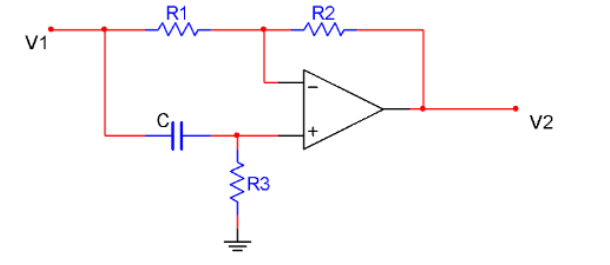

De este circuito se nos pide:
1)Obtener la función transferencia V2/V1 ( módulo , fase y diagrama de polos y ceros).

2)Obtenga la función transferencia, pero normalizada. ¿Cuál sería en este caso la norma de frecuencia y qué interpretación circuital podría tener?

3)Simule la función transferencia normalizada (Python, Matlab, etc.).

4)Simule el circuito y obtenga la respuesta en frecuencia pedida en 1), para los valores:  R2/R1=1; R3=1kΩ y C=1µF

5)¿Qué utilidad podría tener este tipo de circuitos pasa-todo?

### Respuestas

1)  En el uno podemos plantear que la corriente por la rama de C y R3 es  
$I2 = \frac{V1}{R3 + \frac{1}{sC}}= \frac{sCV1}{sCR3+1}$
Ademas la tension en las entradas del opamp (la cual voy a llamar VA) tiene que ser igual en ambas entradas si a este lo consideramos ideal. Esta VA se puede calcular como  
$ VA = V1 - \frac{I2}{sC} $

Reemplazando la I2 antes calculada y trabajando lleamos a $VA = \frac{V1s}{s+ \frac{1}{CR3}}$

Se puede plantear a la corriente que pasa por las resistencias R1 y R2 como $ I1 = \frac{V1-VA}{R1} $  que si reemplazamos VA por lo obtenido anteriormente y despejamos nos terminará quedando $ I1 = \frac{V1}{R1R3C}(\frac{1}{s+ \frac{1}{CR3}})$

Luego podemos ver que $ V1 - (R1 + R2)I1 = V2 $   reemplazando I1 y despejando V2 para obtener la transferencia nos queda 
$ \frac{V2}{V1} = \frac{s-\frac{R2}{R1}\frac{1}{R3C}}{s + \frac{1}{R3C}}$

Para calcular el modulo y la fase se debe reemplazar s por jw y de ahi calcular el modulo y la fase. Eso quedaria 

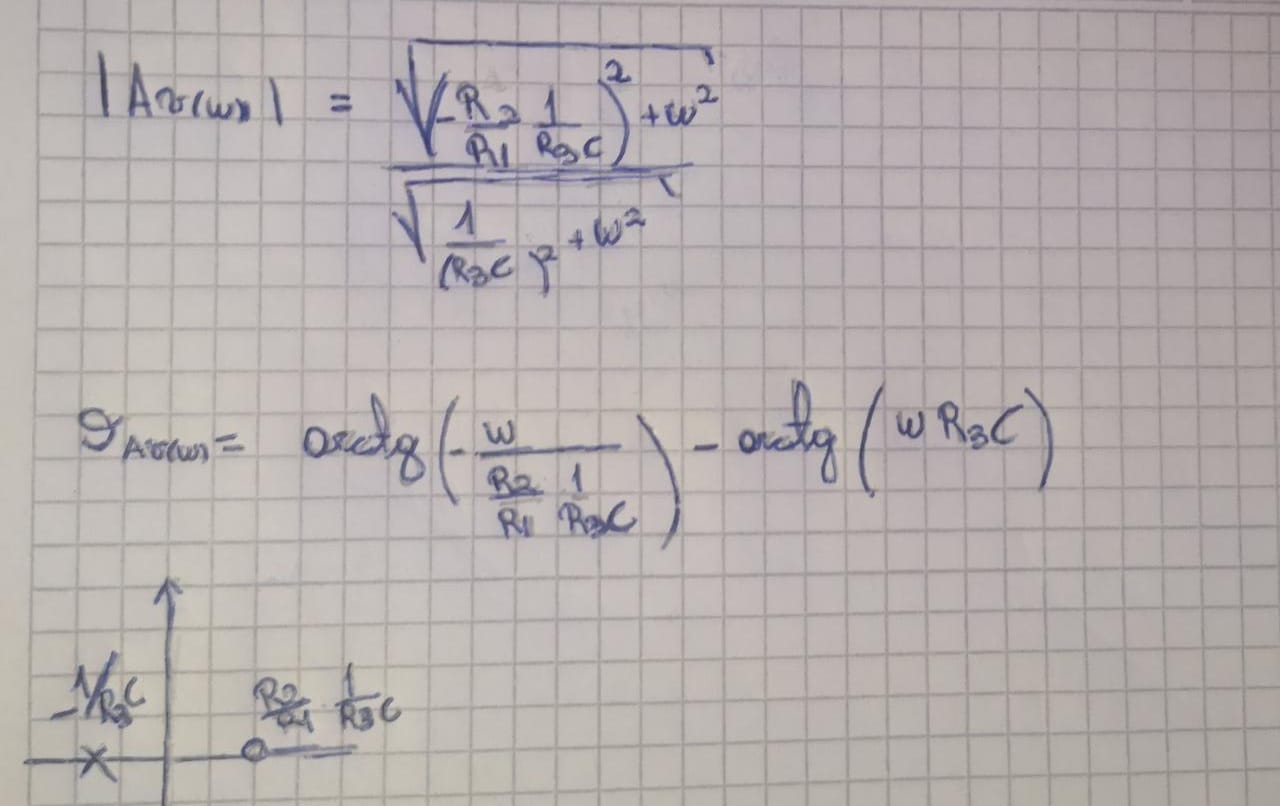

Tambien al final de la imagen se puede ver el diagrama de polos y ceros

2) 
Para normalizar tomamos primero que $\frac{1}{R3C} = wo$  y tomo wo como el factor de normalizacion de la frecuencia. Ahora defino  $\frac{s}{wo} = s'$  y la ganancia normalizada queda $ Av(s')= \frac{s' - \frac{R2}{R1}}{s' +1}$  De aqui se puede observar que la naturlaeza del filtrado dependera de la relacion R2 y R1. 
Para la normalizacion de la impedancia propongo que la norma sea R3. Entonces tendriamos que 
$R1' = \frac{R1}{R3}$
$R2'= \frac{R1}{R3}$
$C'= \frac{1}{R3}$
$R3'=1$

Entonces la transferencia queda $ Av(s')= \frac{s' - \frac{R2'}{R1'}}{s' +1}$

Para analizar en filtro pasabanda necesitamos que $\frac{R2}{R1} = 1$ que eso tambien se traduciria en $\frac{R2'}{R1'} = 1$ . Enconces finalmente nos quedaria que la gancia normalizada es $ Av(s')= \frac{s' - 1}{s' +1}$


3) Simulamos la transferencia en Spider

<IPython.core.display.Math object>

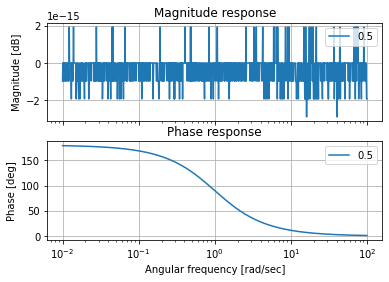

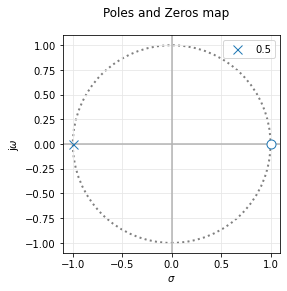

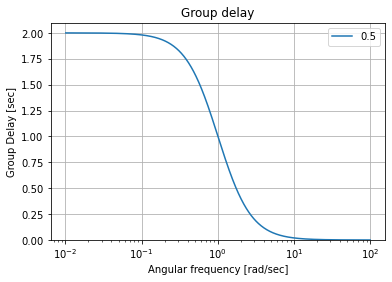

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from splane import analyze_sys, pretty_print_bicuad_omegayq


all_sos = []
all_values = [0.5, 1,5,10]
    
num = np.array([1,-1]) 
den = np.array([ 1, 1])
    
pretty_print_bicuad_omegayq(num,den)

mi_sos = sig.TransferFunction(num,den)

all_sos += [mi_sos]
    
plt.close('all')
analyze_sys(all_sos, sys_name=all_values)

4) Simulamos el circuito en LtSpyce

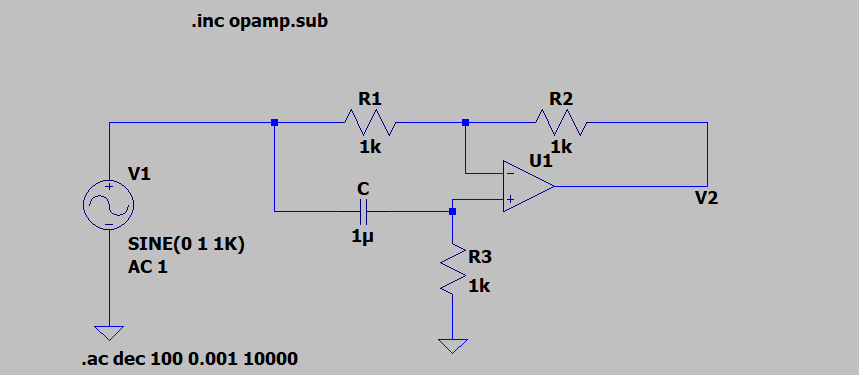

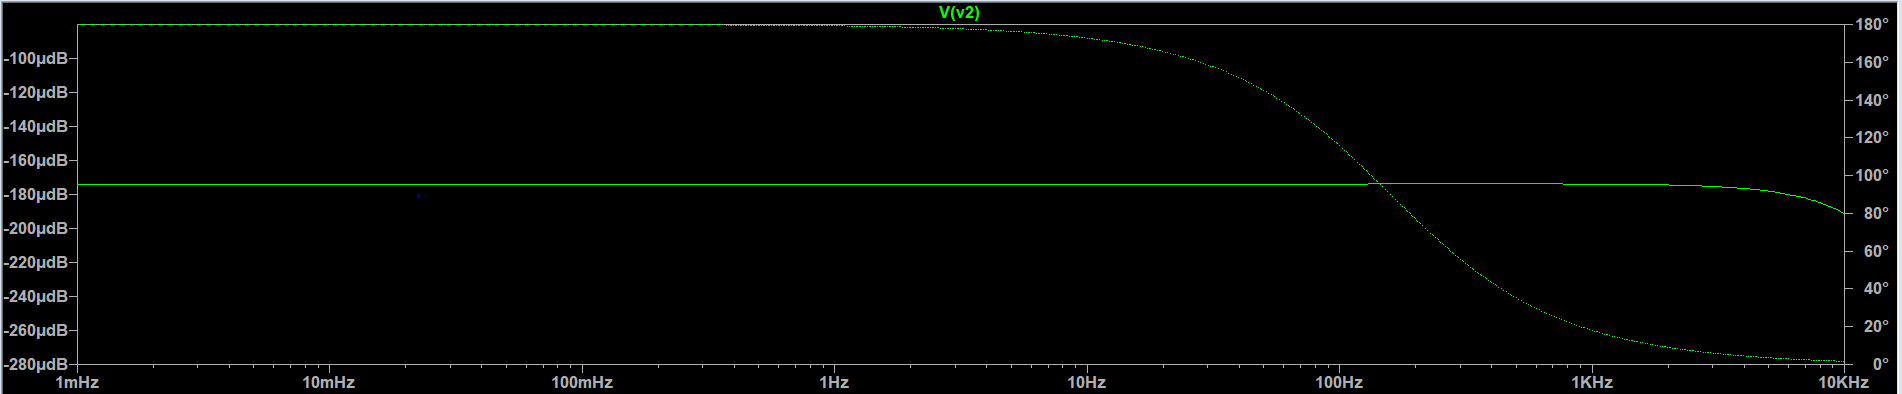


Aca tambien aprovecho el LtSpyce para mostrar una sospecha que tenia en el punto 2. Como dije el tipo de filtrado depende de la relacion R2 y R1. Recien cuando la relacion es 1 se ve que funciona como pasatodos pero si R1 es mayor que R2 (por ejemplo 2k y 1k) podemos ver que se convierte en un pasa altos.
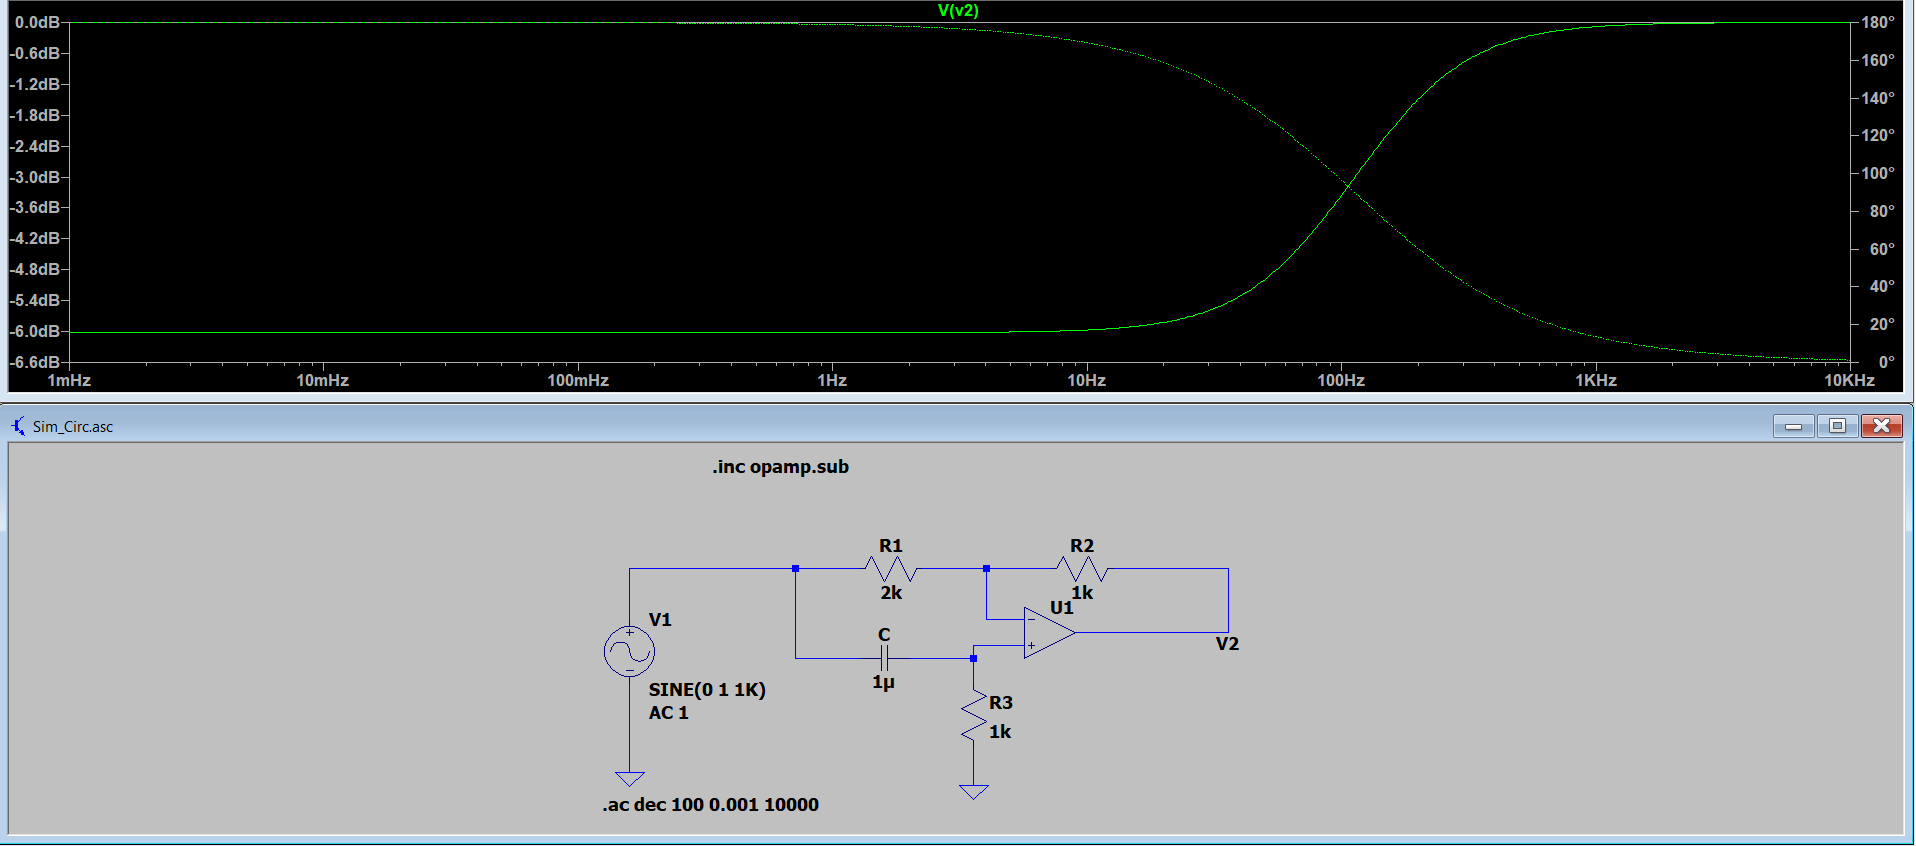
Y si R2 es mas grande que R1 se comporta como pasa bajos
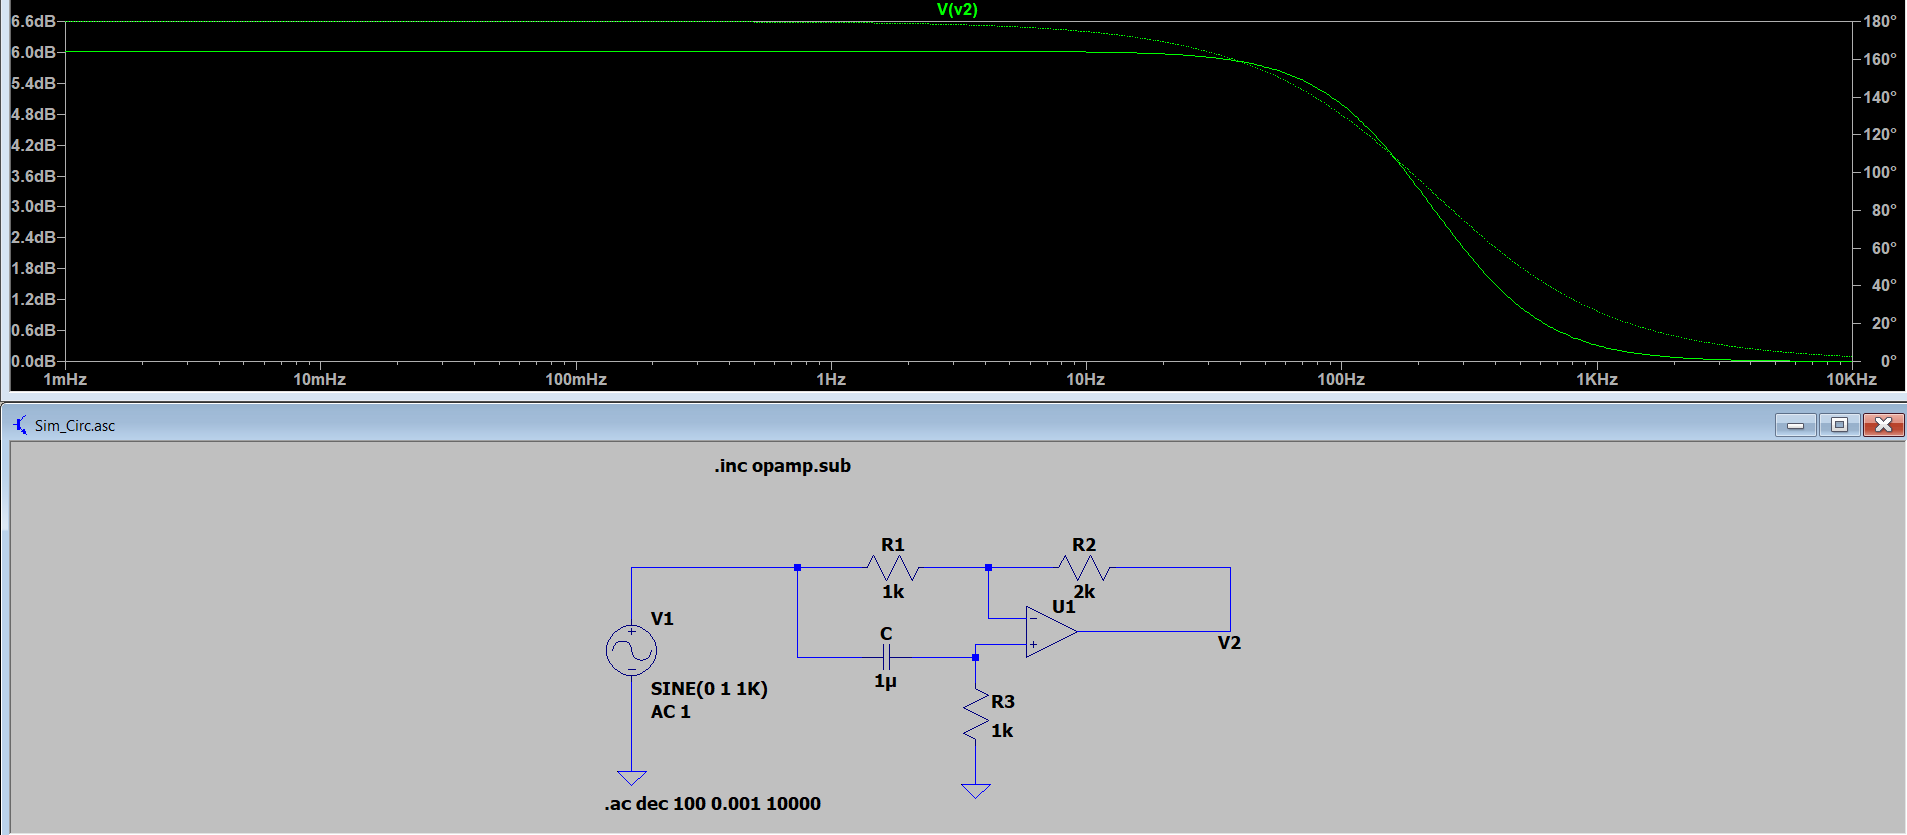



5) La utilidas que pueden tener estos circuitos pasa todos es que nos permiten modificar a todo el espectro de la señal. Por ejemplo si queremos amplificar o atenuar a toda la señal se podria diseñar para que la transferencia quede multiplicada por una constante que cuando se haga el bode la transferencia del pasatodos quede en un cierto nivel de db.
Otra utilidad y para lo que generalmente se utiliza es para retrasar la fase pi. Esto es mas que la mayoria de los circuitos ya que al tener el cero en el semiplano derecho deja que tengamos maximo refraso de fase, Esto sirve para corregir el retardo del grupo si una etapa anterior o posterior nos trae problemas. Entonces modemos modificar la transferencia sin modificar el modulo.